### Seaborn Docs

In [ ]:
import seaborn as sns
%matplotlib inline

In [17]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


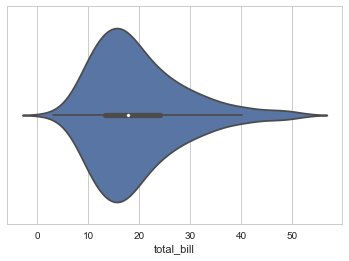

In [28]:
ax = sns.violinplot(x=tips["total_bill"])

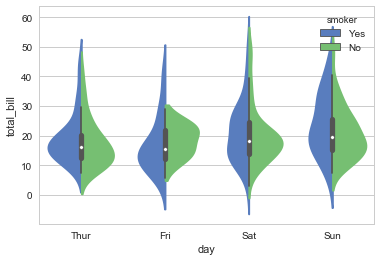

In [30]:
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",data=tips, palette="muted", split=True)

### Randomly Populated Trade DataFrame (Format Original)

In [34]:
import pandas as pd
import numpy as np
num_trades = 1000
week_days = ["Mon","Tues","Wed","Thurs","Fri"]
d = {"tradeId"  : list(range(0,num_trades)),
     "Status A (s)" : np.random.poisson(3,num_trades),
     "Status B (s)" : np.random.uniform(5,20,num_trades),
     "Status C (s)" : np.random.uniform(0,5,num_trades),
     "Error Hit": np.random.choice([0,1],num_trades),
     "Week Day" : np.random.choice(week_days,num_trades)
    }
df_trade = pd.DataFrame(d)
df_trade.head(5)


,Error Hit,Status A (s),Status B (s),Status C (s),Week Day,tradeId
0,1,1,14.585774,3.617210,Mon,0
1,1,4,11.677333,4.776177,Mon,1
2,0,1,7.117270,4.826556,Thurs,2
3,1,4,15.815696,2.505633,Tues,3
4,0,3,5.512049,1.127255,Wed,4


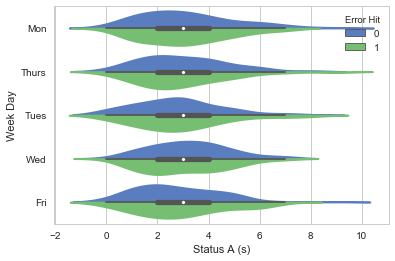

In [44]:
ax = sns.violinplot(y = "Week Day", x = "Status A (s)", hue="Error Hit", data=df_trade, palette="muted", split=True)

### Randomly Populated DF (Violin plot format)

In [46]:
um_rows = 1000
num_trades = 333 # roughly 3 statuses for each trade
status = ["A","B","C"]
d = {"Trade Id"       : np.random.choice(list(range(0,num_trades)),num_trades),
     "Time in Status" : np.random.uniform(5,20,num_trades),
     "Status"         : np.random.choice(status,num_trades),
    }
df_trade_pivoted = pd.DataFrame(d)
df_trade_pivoted["Errors"] = df_trade_pivoted["Trade Id"]%2
df_trade_pivoted.sort_values(by=['Trade Id'], inplace = True)
df_trade_pivoted.head(15)

,Status,Time in Status,Trade Id,Errors
224,B,13.537905,0,0
78,B,9.076457,1,1
14,A,12.199793,2,0
297,A,11.945808,3,1
311,C,16.721557,5,1
178,C,19.284685,5,1
233,C,10.771284,5,1
274,C,7.587699,6,0
212,C,5.208586,9,1
250,A,13.561881,16,0


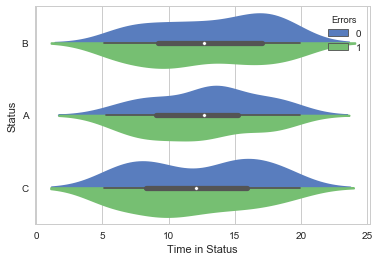

In [47]:
ax = sns.violinplot(y = "Status", x = "Time in Status", hue="Errors", data=df_trade_pivoted, palette="muted", split=True)

### Pivoting from Original Table format to Violin Format